In [1]:
# This version attempts to produce plots for figures 6a-d

In [1]:
import numpy as np
import networkx as nx
from scipy.integrate import solve_ivp
import time
from itertools import product
import matplotlib.pyplot as plt

In [2]:
##############################################
       ### DEFINE FUNCTIONS ###
##############################################

# Define the system
def system(t, y, N, A, K, α, P):
    θ = y[:N]
    ω = y[N:]

    dθ_dt = ω
    dω_dt = np.zeros(N)

    for i in range(N):
        interaction_sum = 0.0
        for j in range(N):
            if A[i, j] != 0:
                interaction_sum += np.sin(θ[j] - θ[i])
        if i == 0 or i == 2: 
            dω_dt[i] = -α * ω[i] - P + K*interaction_sum # power extraction at consumer nodes is -P
        else:
            dω_dt[i] = -α * ω[i] + P + K*interaction_sum

    return np.concatenate([dθ_dt, dω_dt])

# Synchronization check
def is_synchronized(y, threshold=0.05):
    N = len(y) // 2  # Assuming y contains both θ and ω, calculate N
    ω = y[N:]
    
    for i in range(N):
        for j in range(i + 1, N):
            if abs(ω[i] - ω[j]) >= threshold:
                return False
    return True

In [3]:
###########################################################
       ### CONSTRUCT NETWORKS + DEFINE PARAMETERS ###
###########################################################

# Define parameters
N = 4  # Number of nodes
K = 1.0  # Coupling constant
α_list = np.arange(0.1, 3.0, 0.1).tolist()
P_list = np.arange(0.1, 2.0, 0.1).tolist()

# Create the graph and adjacency matrix
G_a = nx.Graph() # Network from Figure 5a
G_b = nx.Graph() # Network from Figure 5b
G_c = nx.Graph() # Network from Figure 5c
G_d = nx.complete_graph(N) # Network from Figure 5d


G_a.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
G_b.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)])
G_c.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])

A_Ga = nx.adjacency_matrix(G_a).todense()
A_Gb = nx.adjacency_matrix(G_b).todense()
A_Gc = nx.adjacency_matrix(G_c).todense()
A_Gd = nx.adjacency_matrix(G_d).todense()

# Define initial conditions
num_initial_conditions = 100
initial_conditions = []
np.random.seed(11)
for _ in range(num_initial_conditions):
    theta0 = np.random.uniform(-np.pi, np.pi, N)
    omega0 = np.random.uniform(-15, 15, N)
    initial_conditions.append(np.concatenate([theta0, omega0]))

# create all combinations of α, P, and initial_conditions
combinations = product(α_list, P_list, initial_conditions)

# Simulation time
t_span = [0, 150]

In [4]:
##############################################
        ### SIMULATION ###
##############################################

# Start the timer
start_time = time.time()

# Sweep parameters and calculate synchronization percentages
sync_results_a = []
check_sol_a = []
sync_counts_a = np.zeros((len(α_list), len(P_list)))

for α, P, y0 in combinations:
    sol_a = solve_ivp(system, t_span, y0, args=(N, A_Ga, K, α, P))
    check_sol_a.append(sol_a)
    sync_status_a = is_synchronized(sol_a.y[:, -1])
    sync_results_a.append((α, P, y0, sync_status_a))

    # Update sync count
    α_idx = α_list.index(α)
    P_idx = P_list.index(P)
    if sync_status_a:
        sync_counts_a[α_idx, P_idx] += 1

# Calculate synchronization percentages
sync_percentages_a = sync_counts_a / num_initial_conditions

# Stop the timer
end_time = time.time()

# Print the time taken
print(f"Time taken to run the simulations: {end_time - start_time} seconds")

Time taken to run the simulations: 1095.450402021408 seconds


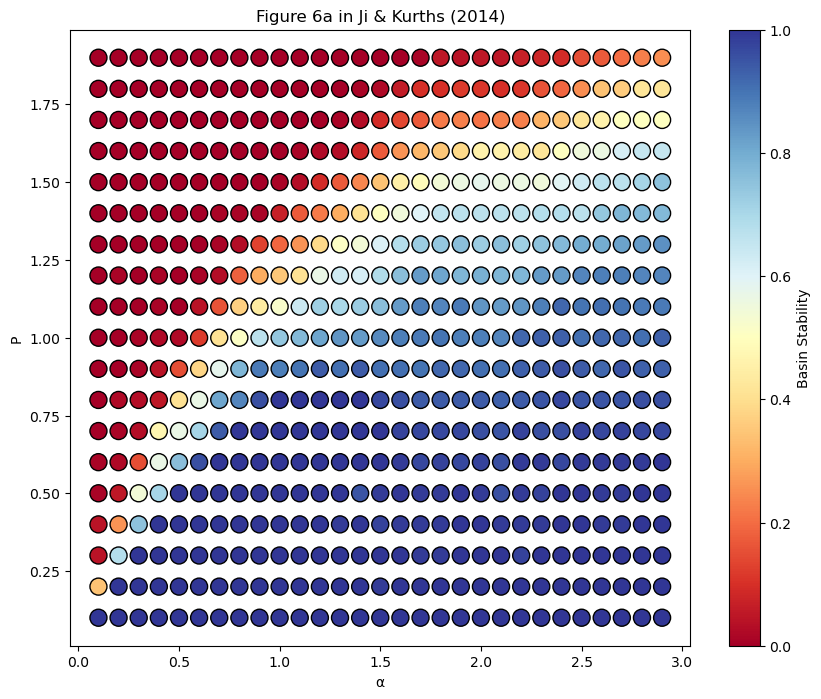

In [5]:
##############################################
       ### CREATING FIGURE 6a ###
##############################################

# Create scatter plot
plt.figure(figsize=(10, 8))
α_vals, P_vals = np.meshgrid(α_list, P_list)
plt.scatter(α_vals, P_vals, c=np.transpose(sync_percentages_a), cmap='RdYlBu', s=150, edgecolor='k')
plt.colorbar(label='Basin Stability')
plt.xlabel('α')
plt.ylabel('P')
plt.title('Figure 6a in Ji & Kurths (2014)')
#plt.savefig('Figure_6a_Ji_2014_check.png', dpi=300)
plt.show()

In [9]:
###########################################################
       ### DEFINE PARAMETERS (6d) ###
###########################################################

# Define parameters

α_list = np.arange(0.05, 3.0, 0.05).tolist()
P_list = np.arange(0.05, 2.0, 0.05).tolist()

# Define initial conditions
num_initial_conditions = 100
initial_conditions = []
np.random.seed(11)
for _ in range(num_initial_conditions):
    theta0 = np.random.uniform(-np.pi, np.pi, N)
    omega0 = np.random.uniform(-15, 15, N)
    initial_conditions.append(np.concatenate([theta0, omega0]))

# create all combinations of α, P, and initial_conditions
combinations = product(α_list, P_list, initial_conditions)

# Simulation time
t_span = [0, 150]

In [10]:
##############################################
        ### SIMULATION ###
##############################################

# Start the timer
start_time = time.time()

# Sweep parameters and calculate synchronization percentages
sync_results_d = []
check_sol_d = []
sync_counts_d = np.zeros((len(α_list), len(P_list)))

for α, P, y0 in combinations:
    sol_d = solve_ivp(system, t_span, y0, args=(N, A_Gd, K, α, P))
    check_sol_d.append(sol_d)
    sync_status_d = is_synchronized(sol_d.y[:, -1])
    sync_results_d.append((α, P, y0, sync_status_d))

    # Update sync count
    α_idx = α_list.index(α)
    P_idx = P_list.index(P)
    if sync_status_d:
        sync_counts_d[α_idx, P_idx] += 1

# Calculate synchronization percentages
sync_percentages_d = sync_counts_d / num_initial_conditions

# Stop the timer
end_time = time.time()

# Print the time taken
print(f"Time taken to run the simulations: {end_time - start_time} seconds")

Time taken to run the simulations: 10039.51076221466 seconds


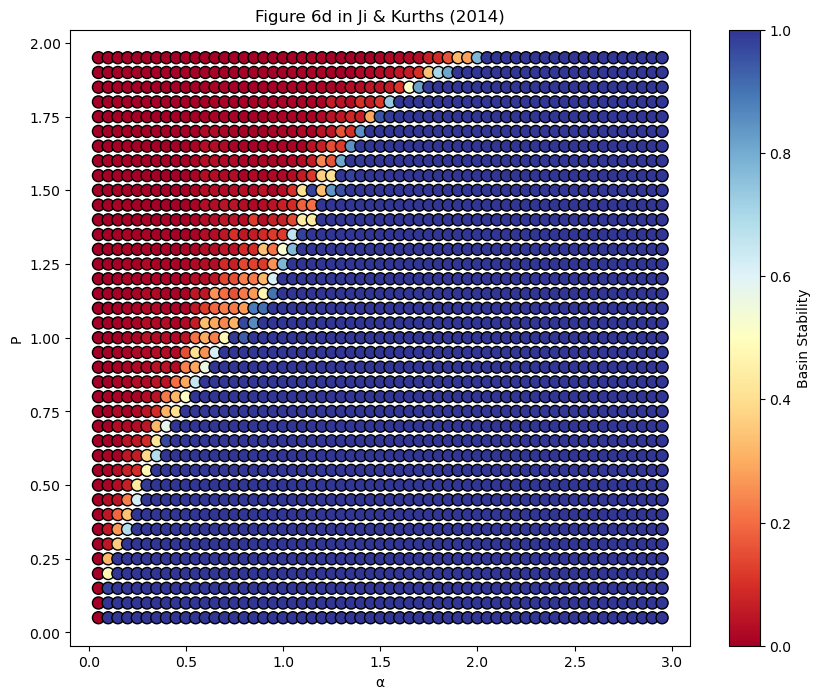

In [11]:
##############################################
       ### CREATING FIGURE 6d ###
##############################################

# Create scatter plot
plt.figure(figsize=(10, 8))
α_vals, P_vals = np.meshgrid(α_list, P_list)
# plt.scatter(α_vals, P_vals, c=sync_percentages_a, cmap='coolwarm_r', s=50, edgecolor='k')
plt.scatter(α_vals, P_vals, c=np.transpose(sync_percentages_d), cmap='RdYlBu', s=75, edgecolor='k')
# KT: sync_percentages_a has α vals as rows and P vals as cols, so you want the transpose of sync_percentages_a
plt.colorbar(label='Basin Stability')
plt.xlabel('α')
plt.ylabel('P')
plt.title('Figure 6d in Ji & Kurths (2014)')
#plt.savefig('Figure_6a_Ji_2014_check.png', dpi=300)
plt.show()